
Please load the file ex2data1.txt...



Saving ex2data1.txt to ex2data1 (1).txt

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



<Figure size 432x288 with 0 Axes>

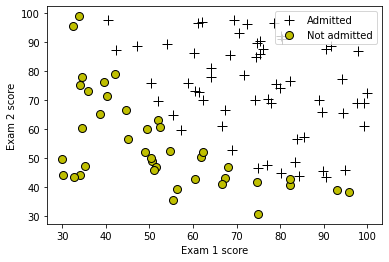


Program paused. Press enter to continue.

Cost at initial theta (zeros)
 0.6931471805599452
Expected cost (approx): 
0.693

Gradient at initial theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 [-0.1000 -12.0092 -11.2628]

Cost at test theta:  0.21833019382659774
Expected cost (approx): 0.218

Gradient at test theta: 
 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 [0.043 2.566 2.647]

Program paused. Press enter to continue.

Cost at theta found by fminunc:
 0.20349770158947414
Expected cost (approx): 0.203

theta: [-25.16131873   0.20623159   0.20147149]
Expected theta (approx):
[-25.161 0.206 0.201]



<Figure size 432x288 with 0 Axes>

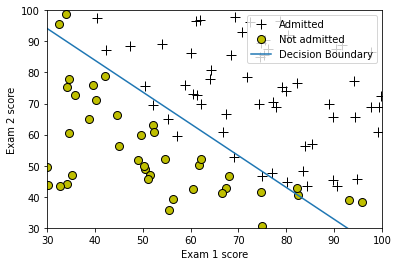


For a student with scores 45 and 85, we predict an admission probability of  0.7762906254677175
Expected value: 0.775 +/- 0.002

Train Accuracy:
 89.0
Expected accuracy (approx): 89.0





In [1]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the logistic
#  regression exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoid.m
#     costFunction.m
#     predict.m
#     costFunctionReg.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Optimization module in scipy
from scipy import optimize


## Initialization
#clear ; close all; clc


def plotData(X, y):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.

# Create New Figure
  fig = plt.figure() 
  plt.show()

# ====================== YOUR CODE HERE ======================
# Instructions: Plot the positive and negative examples on a
#               2D plot, using the option 'k+' for the positive
#               examples and 'ko' for the negative examples.
#
#pos = find(y==1);neg = find( y == 0); #in octave

# Find Indices of Positive and Negative Examples
  pos = y == 1
  neg = y == 0

# Plot Examples
  plt.plot(X[0,pos], X[1,pos], 'k+', lw=2, ms=10)
  plt.plot(X[0,neg], X[1,neg], 'ko', mfc='y', ms=8, mec='k', mew=1)
  
# =========================================================================


def sigmoid(z):
#   SIGMOID Compute sigmoid function
#   g = SIGMOID(z) computes the sigmoid of z.

# You need to return the following variables correctly 
  g = np.zeros((z.size))

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the sigmoid of each value of z (z can be a matrix,
#               vector or scalar).


  #g = 1./(1+exp(-z)) #in octave
  g = 1/(1+ np.exp(-z))
  return g

# =============================================================



def costFunction(theta, X, y):
#   COSTFUNCTION Compute cost and gradient for logistic regression
#   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
#   parameter for logistic regression and the gradient of the cost
#   w.r.t. to the parameters.

# Initialize some useful values
  m = y.size # number of training examples

# You need to return the following variables correctly 
  J = 0
  grad = np.zeros(theta.shape)

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta.
#               You should set J to the cost.
#               Compute the partial derivatives and set grad to the partial
#               derivatives of the cost w.r.t. each parameter in theta
#
# Note: grad should have the same dimensions as theta
#

  # ====================== YOUR CODE HERE ======================

  h = sigmoid(np.dot(X.T,theta))

  J  = (1/m)*np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))
  grad = (1/m)*(h-y).dot(X.transpose())
  # =============================================================

  return J,grad


# =============================================================



def plotDecisionBoundary(theta, X, y):
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones

# Plot Data
  plotData(X,y) 
  #X = np.concatenate([np.ones((1,m)), X], axis=0)
  #if np.size(X, 1) <= 3:
  # Only need 2 points to define a line, so choose two endpoints
  plot_x = [min(X[1,:])-2,  max(X[1,:])+2]
  # Calculate the decision boundary line
  #plot_y = (-1./theta[3]).*(theta[2].*plot_x + theta[1]) #octave
  plot_y = np.dot((-1/theta[2]),(np.dot(theta[1],plot_x) + theta[0]))
  #plot_y = -(theta[0] + theta[1] * plot_x) / theta[2]
  # Plot, and adjust axes for better viewing
  plt.plot(plot_x, plot_y)
    # Legend, specific for the exercise
  plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'],loc =1)
  plt.axis([30, 100, 30, 100])
  #plt.show()

# ================================================================





def predict(theta, X):
#PREDICT Predict whether the label is 0 or 1 using learned logistic 
#regression parameters theta
#   p = PREDICT(theta, X) computes the predictions for X using a 
#   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

  m = np.size(X, 1) # Number of training examples
# You need to return the following variables correctly
  p = np.zeros((1,m))

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned logistic regression parameters. 
#               You should set p to a vector of 0's and 1's
#

  p = ((sigmoid(np.dot(X.T,theta)))>=0.5)
  return p
                                    
# =========================================================================


## Load Data
print('\nPlease load the file ex2data1.txt...\n') 
#  The first two columns contains the exam scores and the third column
#  contains the label/chance of admission.
#Your task is to build a classification model that estimates an applicant’s probability of admission 
#based the scores from those two exams.

from google.colab import files

path_to_file = list(files.upload().keys())[0]
data = np.loadtxt(path_to_file,delimiter=',',usecols=(0,1,2),unpack = True)

X, y = data[0:2,:], data[2,:]
X_copy = X.copy()
## ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print('\nPlotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n');
plotData(X, y)

# Put some labels 
#plt.show()
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'],loc =1)
plt.show()

print('\nProgram paused. Press enter to continue.\n')
#pause;

## ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in 
#  costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
#[m, n] = size(X);
m = X.shape[1]
n = X.shape[1]

# Add intercept term to x and X_test
#X = [ones(m, 1) X]; #octave
X = np.concatenate([np.ones((1,m)), X], axis=0)

# Initialize fitting parameters
initial_theta = np.array([0, 0, 0])

# Compute and display initial cost and gradient
cost,grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros)\n', cost)
print('Expected cost (approx): \n0.693\n');
print('Gradient at initial theta (zeros):\n',grad)
print('Expected gradients (approx):\n [-0.1000 -12.0092 -11.2628]')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost,grad = costFunction(test_theta, X, y)

print('\nCost at test theta: ', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n',grad);
print('Expected gradients (approx):\n [0.043 2.566 2.647]')
print('\nProgram paused. Press enter to continue.\n')
#pause



## ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.

#  Set options for fminunc
#options = optimset('GradObj', 'on', 'MaxIter', 400)
#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost 
#theta, cost = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options)

# set options for optimize.minimize
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by fminunc:\n', cost)
print('Expected cost (approx): 0.203\n')
print('theta:',theta)
print('Expected theta (approx):')
print('[-25.161 0.206 0.201]\n')

# Plot Boundary
plotDecisionBoundary(theta, X_copy, y)

# Put some labels 
#hold on;
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
#plt.legend(['Admitted', 'Not admitted'],loc = 1)
plt.show()
#pause;

# ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Your task is to complete the code in predict.m

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

prob = sigmoid(np.dot([1, 45, 85], theta))
print('\nFor a student with scores 45 and 85, we predict an admission probability of ', prob)
print('Expected value: 0.775 +/- 0.002\n');

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy:\n', np.mean(np.double(p == y)) * 100)
print('Expected accuracy (approx): 89.0\n');
print('\n');



